<a href="https://colab.research.google.com/github/JSLC1331/Machine-Learning-and-Data-Analysis/blob/main/Soluci%C3%B3n_Evaluacion_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre del estudiante:** Jhon Sebastián Londoño Cárdenas.<br />
**Asignatura:** Aprendizaje Automático y Análisis de Datos.<br />
Tercer Parcial.

# Exercise 1


## Mnist dataset


MNIST is a dataset, which is a set of 70,000 small
images of digits handwritten by high school students and employees of the US Census
Bureau. Each image is labeled with the digit it represents. This set has been studied
so much that it is often called the “hello world” of Machine Learning: whenever
people come up with a new classification algorithm they are curious to see how it will
perform on MNIST, and anyone who learns Machine Learning tackles this dataset
sooner or later.

Scikit-Learn provides many helper functions to download popular datasets. MNIST is
one of them. The following code fetches the MNIST dataset:

In [ ]:
#Load dataset
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
#Select X, y 
X, y = mnist["data"], mnist["target"]
X.shape

(1797, 64)

In [ ]:
#Select a digit
some_digit = X[0]
some_digit_image = some_digit.reshape(8, 8)

In [ ]:
#Digit resolution
some_digit.reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

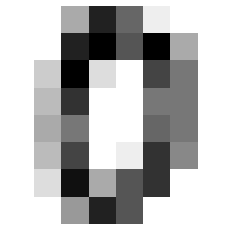

In [ ]:
#Plot a digit
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

### Tasks

1: Explore Mnist dataset

2: Train SVM model that can solve the multiclass-clasification taks. Use a validation curve to finde the value of C that porduces the maximum accuracy

3: Train Desicion Tree model that can solve the multiclass-clasification taks. Use a validation curve to finde the value of C that porduces the maximum accuracy

4: Train Random Forest model that can solve the MNIST multiclass-clasification taks. Use a validation curve to finde the value of max_depth that porduces the maximum accuracy

5: Train a Aritifical Neural Network that can solve the MNIST  multiclass-clasification taks.

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np
#Import classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#Import accuracy score from sklearn
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV

## Task 1: Explorando el dataset

### En qué consiste el dataset

En resumidas cuentas, el corpus con el que estamos trabajando está conformado por imágenes en baja resolución de los números del 0 al 9. Algunos ejemplos de las matrices y las imágenes generadas fueron mostrados en el enunciado, por lo que no parece tan necesario volver a mostrarlas en este apartado.

### Objetivo
Lo que se quiere hacer es construir una serie de modelos de machine learning y deep learning, encontrando los mejores parámetros, los cuales permitan resolver el problema de clasificación con la máxima accuracy posible. El problema de clasificación consiste en determinar correctamente a qué número corresponde la imagen del dataset (entre el cero y el nueve).

### Revisión de la variable objetivo

Analizando un poco la variable objetivo nos damos cuenta que consta de 10 clases en total, las cuales son los números que van del 0 al 9, ya que esto es lo que tenemos que identificar en las imágenes. Algo importante a destacar es que las clases están balanceadas, es decir, no se presentan grandes diferencias en las frecuencias de estas, lo cual es una buena señal, ya que esto podría llegar a afectar el desempeño de los modelos. Como un ejemplo se toma un dataset con el que se trabajó en la clase de Sistemas Inteligentes, en el cual la frecuencia de una de las clases representaba casi el triple de la otra, por lo tanto los modelos no obtenian buenos resultados en métricas como el accuracy.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


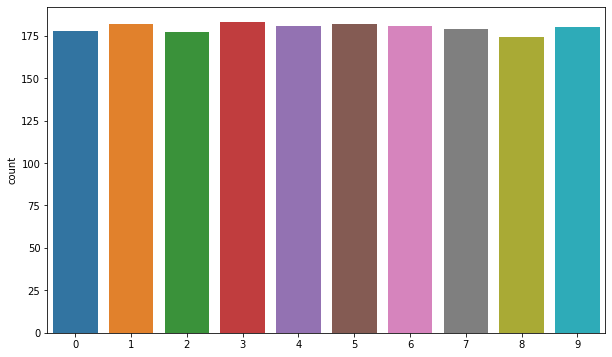

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y)

### Preprocesamiento

Debido a la nueva naturaleza de los datos se produjeron varias dudas sobre si se debe realizar preprocesamiento a los datos. Se consultó al respecto y se encontraron métodos no vistos en clase para este tipo de corpus que usan estos datos, no obstante, por cuestiones de tiempo no se usaron, por lo que la información se usó tal cual en los modelos.<br />

Respecto al uso de Standard Scaler, se observó que se usa normalmente para datos numéricos que representan características medibles, como la longitud de pétalos, por lo tanto, al tener datos numéricos que representan algo distinto (matrices que representan imágenes) se decidió no utilizarlo. 

## Task 2: SVM

### Encontrando el mejor C

In [ ]:
from sklearn.svm import SVC

svmModel = SVC(C = 2)
svmModel.get_params()

{'C': 2,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
cValues = np.arange(0.05, 10, 0.05) # Se crea un arreglo de valores que serán aquellos con los cuales se va a probar el C del modelo de SVM para saber cuál tiene mejor desempeño en cuanto a la métrica de accuracy.
cValues

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
       2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75,
       2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 ,
       3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85,
       3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 ,
       4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95,
       5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45, 5.5 ,
       5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  , 6.05,
       6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55, 6.6 ,
       6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 , 7.15,
       7.2 , 7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.

In [ ]:
score_train, score_test = validation_curve(svmModel, X, y, param_name ='C', param_range = cValues, cv = 5, scoring ='accuracy')

In [ ]:
score_test.mean(axis=1) # Se listan los accuracy de los C que se tuvieron en cuenta.

array([0.90597493, 0.93156763, 0.94158465, 0.94659084, 0.94992881,
       0.95159703, 0.95382544, 0.95549675, 0.95716496, 0.95660786,
       0.95883318, 0.95938873, 0.95883473, 0.96050294, 0.96050294,
       0.9610585 , 0.9621727 , 0.96272826, 0.96328381, 0.96328381,
       0.96272671, 0.96328227, 0.96439492, 0.96439492, 0.96495048,
       0.96606314, 0.96662024, 0.9671758 , 0.96662024, 0.96606314,
       0.96662024, 0.9671758 , 0.96828846, 0.96884401, 0.96884401,
       0.97051377, 0.97051377, 0.97051377, 0.97051377, 0.97051377,
       0.97051377, 0.97162798, 0.97218508, 0.97218508, 0.97218508,
       0.97218508, 0.97274064, 0.97274064, 0.97274064, 0.97274064,
       0.97274064, 0.97274064, 0.97274064, 0.97274064, 0.97274064,
       0.97218353, 0.97218353, 0.97274064, 0.97274064, 0.97274064,
       0.97274064, 0.97274064, 0.97274064, 0.97274064, 0.97274064,
       0.97274064, 0.97274064, 0.97329619, 0.97329619, 0.97329619,
       0.97385175, 0.97385175, 0.97385175, 0.97385175, 0.97385

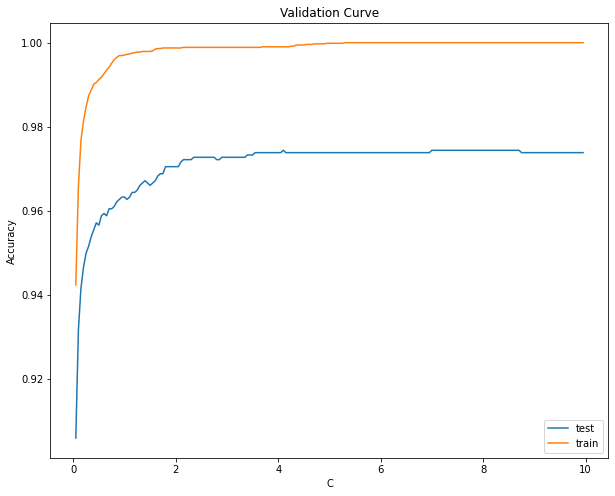

In [ ]:
# Graficando la curva de validación.
plt.figure(figsize=(10,8))
plt.plot(cValues, score_test.mean(axis=1), label='test')
plt.plot(cValues, score_train.mean(axis=1), label='train')
plt.title('Validation Curve')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Seleccionando el mejor modelo basado en la métrica de accuracy.
idx = score_test.mean(axis=1).argmax()
bestC = cValues[idx]
bestC
print("Mejor valor de C es", bestC)
print("El accuracy producido por el mejor C es",score_test.mean(axis=1)[81])

Mejor valor de C es 4.1
El accuracy producido por el mejor C es 0.9744073042401734


### Entrenando el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # División de los datos en entrenamiento y validación.

In [ ]:
finalSVM = SVC(C = bestC) # Se crea una instancia del modelo con el mejor parámetro C encontrado en la sección anterior.
finalSVM.fit(X_train, y_train) # Se ajusta el modelo.

SVC(C=4.1)

In [ ]:
y_pred_train = finalSVM.predict(X_train) # Predicciones para los datos de entrenamiento.
y_pred_test = finalSVM.predict(X_test) # Predicciones para los datos de validación.

In [ ]:
# Reporte general donde se observan en una tabla las métricas de puntajes precision, recall y f1 para las predicciones de todas las clases.
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
# Desempeño del modelo basado en la métrica de accuracy.
print("Accuracy_train", accuracy_score(y_pred_train, y_train))
print("Accuracy_test",accuracy_score(y_pred_test, y_test))

Accuracy_train 0.9993041057759221
Accuracy_test 0.9888888888888889


### Comentarios

Para el modelo de Support Vector Machine se usó una curva de validación con la intención de encontrar el mejor parámetro C, el cual determina la cantidad de puntos que estarán dentro de margin y cuántos fuera, por lo tanto, se trata de una aplicación de Soft Margin SVM. <br />

El intervalo usado para tomar los valores posibles de C fue de 0.05 a 10 aumentando 0.05 en cada paso. De esta manera se buscaba manejar varios valores no tan grandes para observar el comportamiento. Al final resultó ser útil esta lógica debido a que en los valores más altos se estancaba y producía el mismo desempeño.

## Task 3: Decision Tree

### Encontrando la mejor profundidad

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Se importa la herramienta necesaria para aplica los árboles de decisión.

In [ ]:
dtModel = DecisionTreeClassifier(criterion = 'gini', max_depth = 2) # Se crea una instancia de la clase del modelo para luego hacer uso de ella.
dtModel.get_params() # Consulta de parámetros del modelo.

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
depthValues = np.arange(1, 100) # Se crea un arreglo donde se guardan los posibles valores de la profundidad con la finalidad de encontrar aquella que resulte con un mejor accuracy.
depthValues

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
score_train, score_test = validation_curve(dtModel, X, y, param_name ='max_depth', param_range = depthValues, cv = 10, scoring ='accuracy') # Se aplica la curva de validación.

In [ ]:
score_test.mean(axis=1) # Se listan los accuracy de las profundidades que se tuvieron en cuenta.

array([0.19755121, 0.31111421, 0.45913408, 0.54537244, 0.63832092,
       0.73788641, 0.78796089, 0.80801986, 0.82749534, 0.82578212,
       0.82634699, 0.82247362, 0.82412166, 0.8224612 , 0.82970205,
       0.82080074, 0.83079764, 0.82581006, 0.81800435, 0.82693669,
       0.8341496 , 0.82077592, 0.82192427, 0.82747362, 0.82526071,
       0.82857852, 0.82191496, 0.83358163, 0.83637182, 0.82915891,
       0.8263532 , 0.82801366, 0.81969584, 0.82191186, 0.82689634,
       0.8291527 , 0.81967412, 0.82080695, 0.82132216, 0.83082557,
       0.82803538, 0.81354749, 0.82860335, 0.81857852, 0.82526071,
       0.82190875, 0.82021726, 0.82522967, 0.82689013, 0.82634699,
       0.823563  , 0.82634389, 0.82301055, 0.82523588, 0.82358473,
       0.83358473, 0.827455  , 0.83247983, 0.827455  , 0.83081316,
       0.82803228, 0.82191806, 0.82523588, 0.82080074, 0.82024209,
       0.82802297, 0.82690565, 0.83303228, 0.8213594 , 0.82189323,
       0.8274581 , 0.82468343, 0.82189944, 0.81580695, 0.82358

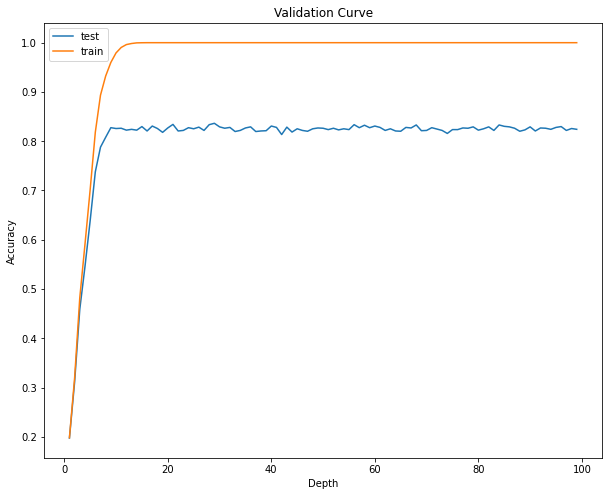

In [ ]:
# Graficando la curva de validación.
plt.figure(figsize=(10,8))
plt.plot(depthValues, score_test.mean(axis=1), label='test')
plt.plot(depthValues, score_train.mean(axis=1), label='train')
plt.title('Validation Curve')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Seleccionando el mejor modelo basado en la métrica de accuracy.
idx = score_test.mean(axis=1).argmax()
bestDepth = depthValues[idx]
print("Mejor valor para la profundidad es", bestDepth)
print("El accuracy producido por la mejor profundidad es",score_test.mean(axis=1)[idx])

Mejor valor para la profundidad es 29
El accuracy producido por la mejor profundidad es 0.8363718187461207


### Entrenando el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Selección de datos de entrenamiento y validación.

In [ ]:
finalDT = DecisionTreeClassifier(criterion = 'gini', max_depth = bestDepth) # Se crea una instancia de la clase del modelo con el mejor parámetro encontrado.
finalDT.fit(X_train, y_train) # Se ajusta el modelo.

DecisionTreeClassifier(max_depth=29)

In [ ]:
y_pred_train = finalDT.predict(X_train) # Se realizan las predicciones para los datos de entrenamiento.
y_pred_test = finalDT.predict(X_test) # Se realizan las predicciones para los datos de validación.

In [ ]:
# Reporte general donde se observan en una tabla las métricas de puntajes precision, recall y f1 para las predicciones de todas las clases.
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.92      0.79      0.85        28
           2       0.86      0.76      0.81        33
           3       0.75      0.88      0.81        34
           4       0.82      0.87      0.84        46
           5       0.90      0.91      0.91        47
           6       0.91      0.91      0.91        35
           7       0.88      0.82      0.85        34
           8       0.75      0.70      0.72        30
           9       0.78      0.88      0.82        40

    accuracy                           0.85       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.85      0.85       360



In [ ]:
# Desempeño del modelo basado en la métrica de accuracy.
print("Accuracy_train", accuracy_score(y_pred_train, y_train))
print("Accuracy_test",accuracy_score(y_pred_test, y_test))

Accuracy_train 1.0
Accuracy_test 0.8472222222222222


### Comentarios

Para el modelo de Decision Tree también se usó una curva de validación para encontrar la profundidad que produce el mejor accuracy para el modelo. <br />

En este caso se usó un intervalo de posibles profundidades que van desde 1 a 100, obteniendo resultados bastante malos para las primeras profundidades, pero logrando estabilizarse por encima del 80% de accuracy en profundidades mayores.<br />

Se usó como criterio gini, ya que fue el visto y explicado en clase, sin embargo, en algunas pruebas se pudo observar que entropy tiene resultado ligeramente mejores.

## Task 4: Random Forest

### Encontrando la mejor profundidad

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Se importa la herramienta necesaria para aplicar Random Forest.

In [ ]:
rfModel = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 2)
rfModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rfDepths = np.arange(2, 50, 2)
rfDepths

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [ ]:
score_train, score_test = validation_curve(rfModel, X, y, param_name ='max_depth', param_range = rfDepths, cv = 10, scoring ='accuracy') # Se aplica la curva de validación.

In [ ]:
score_test.mean(axis=1) # Se listan los accuracy de las profundidades que se tuvieron en cuenta.

array([0.80800745, 0.89091248, 0.92928926, 0.94154873, 0.94989758,
       0.94489137, 0.95102421, 0.95324022, 0.95158908, 0.95047176,
       0.95046245, 0.94767225, 0.95213842, 0.94990689, 0.95213222,
       0.95102421, 0.9510149 , 0.95103042, 0.94712601, 0.94767846,
       0.94934823, 0.9471198 , 0.95325574, 0.95047176])

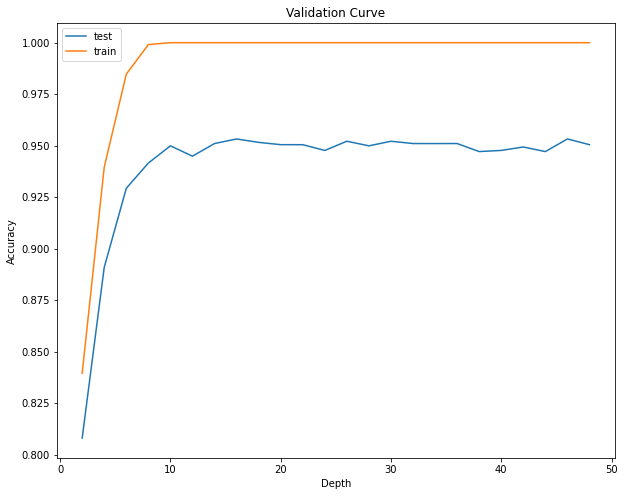

In [ ]:
# Graficando la curva de validación.
plt.figure(figsize=(10,8))
plt.plot(rfDepths, score_test.mean(axis=1), label='test')
plt.plot(rfDepths, score_train.mean(axis=1), label='train')
plt.title('Validation Curve')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Seleccionando el mejor modelo basado en la métrica de accuracy.
idx = score_test.mean(axis=1).argmax()
bestDepthRF = rfDepths[idx]
print("Mejor valor para la profundidad es", bestDepthRF)
print("El accuracy producido por la mejor profundidad es",score_test.mean(axis=1)[idx])

Mejor valor para la profundidad es 46
El accuracy producido por la mejor profundidad es 0.9532557417752947


### Entrenando el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Selección de datos de entrenamiento y validación.

In [ ]:
finalRF = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = bestDepthRF) # Se crea una instancia de la clase del modelo con el mejor parámetro encontrado anteriormente.
finalRF.fit(X_train, y_train) # Se ajusta el modelo.

RandomForestClassifier(max_depth=46, n_estimators=200)

In [ ]:
y_pred_train = finalRF.predict(X_train) # Se hacen las predicciones para datos de entrenamiento.
y_pred_test = finalRF.predict(X_test) # Se hacen las predicciones para datos de validación.

In [ ]:
# Reporte general donde se observan en una tabla las métricas de puntajes precision, recall y f1 para las predicciones de todas las clases.
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
# Desempeño del modelo basado en la métrica de accuracy.
print("Accuracy_train", accuracy_score(y_pred_train, y_train))
print("Accuracy_test",accuracy_score(y_pred_test, y_test))

Accuracy_train 1.0
Accuracy_test 0.9833333333333333


### Comentarios

Para el modelo de Random Forest también se usó una curva de validación para encontrar la profundidad que produce el mejor accuracy para el modelo. <br />

En este caso se usó un intervalo de posibles profundidades que van desde 2 a 50 con pasos de a 2, ya que el modelo se demoraba mucho al poner varias opciones de profundidades.<br />

Como el enunciado pedía solo encontrar la profundidad, se colocó un número fijo en la cantidad de árboles, no obstante en otra versión se busca el mejor valor para ambos parámetros.

## Task 4 Versión 2: Random Forest

### Encontrando la mejor cantidad de árboles y la mejor profundidad

In [ ]:
auxRFModel = RandomForestClassifier()

treesNumber = [100, 150, 200]
depth = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

hyperparams = dict(n_estimators = treesNumber,
                   max_depth = depth)

grid = GridSearchCV(auxRFModel, hyperparams, cv = 10, scoring = 'accuracy')

# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)

In [ ]:
print('La mejor profundidad encontrada es', grid_search.best_estimator_.get_params()['max_depth']) # Se muestra la profundidad máxima con la cual se obtuvo el mejor desempeño en el modelo.
print('La mejor cantidad de árboles encontrada es', grid_search.best_estimator_.get_params()['n_estimators']) # Se muestra el criterio con el cual se obtuvo mejor desempeño en el modelo.

La mejor profundidad encontrada es 14
La mejor cantidad de árboles encontrada es 200


In [ ]:
bestDepthRF = grid_search.best_estimator_.get_params()['max_depth']
bestTreesRF = grid_search.best_estimator_.get_params()['n_estimators']

### Aplicando los mejores parámetros encontrados

In [ ]:
finalRandomForestModel = RandomForestClassifier(n_estimators = bestTreesRF, criterion='gini', max_depth = bestDepthRF)
finalRandomForestModel.fit(X_train, y_train)

y_pred_train = finalRandomForestModel.predict(X_train)
y_pred_test = finalRandomForestModel.predict(X_test)

In [ ]:
# Reporte general donde se observan en una tabla las métricas de puntajes precision, recall y f1.
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       1.00      0.98      0.99        41
           2       0.97      0.97      0.97        36
           3       1.00      1.00      1.00        35
           4       0.97      0.89      0.93        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        39
           7       0.89      0.97      0.93        34
           8       0.97      0.97      0.97        33
           9       0.95      0.97      0.96        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
# Desempeño del modelo basado en la métrica de accuracy.
print("Accuracy_train", accuracy_score(y_pred_train, y_train))
print("Accuracy_test",accuracy_score(y_pred_test, y_test))

Accuracy_train 1.0
Accuracy_test 0.9722222222222222


### Comentarios

Se decidió hacer una segunda versión del Random Forest donde se busca el mejor valor para la cantidad de árboles y la profundidad, ya que se considera que estos son los datos más importante e influyentes en este modelo teniendo en cuenta lo visto en clase.<br />

Para encontrar el mejor valor de ambos parámetros se usó gridseach y no una curva de validación, esto debido a que era más de un parámetro.

## Task 5: Artificial Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier # Se importa la herramienta necesaria para aplicar multi layer perceptron classifier.

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2) # División de los datos de entrenamiento y validación.

In [ ]:
mlpModel = MLPClassifier(hidden_layer_sizes = (20, 10, 10, 10), max_iter = 500, learning_rate_init = 0.001) # Se crea una instancia de la clase del modelo.
mlpModel.fit(X_train, y_train) # Se ajusta el modelo.

MLPClassifier(hidden_layer_sizes=(20, 10, 10, 10), max_iter=500)

In [ ]:
y_pred_train = mlpModel.predict(X_train) # Se hacen las predicciones para datos de entrenamiento.
y_pred_test = mlpModel.predict(X_test) # Se hacen las predicciones para datos de validación.

In [ ]:
# Reporte general donde se observan en una tabla las métricas de puntajes precision, recall y f1 para las predicciones de todas las clases.
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.92      0.92        38
           2       0.98      1.00      0.99        45
           3       0.96      0.96      0.96        28
           4       0.94      0.97      0.96        33
           5       0.92      0.94      0.93        35
           6       1.00      0.97      0.98        31
           7       0.97      0.93      0.95        41
           8       0.85      0.94      0.89        35
           9       0.91      0.84      0.88        38

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



In [ ]:
# Desempeño del modelo basado en la métrica de accuracy.
print("Accuracy_train", accuracy_score(y_pred_train, y_train))
print("Accuracy_test",accuracy_score(y_pred_test, y_test))

Accuracy_train 1.0
Accuracy_test 0.9444444444444444


### Comentarios

Para el modelo de Redes Neuronales se usó el clasificador de perceptrón multicapa. En esta ocasión el modelo usado tiene 4 capas con 20, 10, 10 y 10 neuronas correspondientemente; también se usó una cantidad de épocas de 500 y un learning rate inicial de 0.001. <br />

Se manejó de esta manera también para evitar el overfitting, no colocando más neuronas de las que eran necesarias.

# Excercise 2

## Simple example and notation

Consider a very simple neural network which is fromed by a bunch of logistic regressions, that is, each **artifical neuron** compute a weeigthed sum and the apply a sigmoid transformation. Moreover, let's assume that we only have one input feature and $N$ samples

<p><img alt="Colaboratory logo" height="300px" width="5000px" src="https://i.imgur.com/jqwweZb.png" align="center" hspace="10px" vspace="0px"></p>


The output of the $l$-th neuron is given by

\begin{equation}
z^{[l]} = w^{[l]}X^{[l-1]} + b^{[l]} \\
X^{[l]} = \sigma(z^{[l]})
\end{equation}


The first layer (also called first hidden layer) is given by

\begin{equation}
z^{[1]} = w^{[1]}X^{[0]} + b^{[1]} \\
X^{[1]} = \sigma(z^{[1]})
\end{equation}

where

\begin{equation}
X^{[0]}  = \begin{bmatrix}
                x^{[0](1)}\\
                x^{[0](2)}\\
                .\\
                .\\
                x^{[0](N)}\\
                \end{bmatrix}\,
z^{[1]}  = \begin{bmatrix}
                w^{[1]}x^{(1)} + b^{[1]}\\
                w^{[1]}x^{(2)} + b^{[1]}\\
                .\\
                .\\
                w^{[1]}x^{(N)} + b^{[1]}\\
                \end{bmatrix}\,
X^{[1]}  = \begin{bmatrix}
                \sigma(w^{[1]}x^{(1)} + b^{[1]})\\
                \sigma(w^{[1]}x^{(2)} + b^{[1]})\\
                .\\
                .\\
                \sigma(w^{[1]}x^{(N)} + b^{[1]})\\
                \end{bmatrix}\,  =  
                \begin{bmatrix}
                x^{[1](1)}\\
                x^{[1](2)}\\
                .\\
                .\\
                x^{[1](N)}\\
                \end{bmatrix}\,           
\end{equation}

* $N$ denotes the number of total instances in the 


The second layer (also called second hidden layer) is given by

\begin{equation}
z^{[2]} = w^{[2]}X^{[1]} + b^{[2]} \\
X^{[2]} = \sigma(z^{[2]})
\end{equation}

where

\begin{equation}
X^{[1]}  = \begin{bmatrix}
                x^{[1](1)}\\
                x^{[1](2)}\\
                .\\
                .\\
                x^{[1](N)}\\
                \end{bmatrix}\,
z^{[2]}  = \begin{bmatrix}
                w^{[2]}x^{[1](1)} + b^{[2]}\\
                w^{[2]}x^{[1](2)} + b^{[2]}\\
                .\\
                .\\
                w^{[2]}x^{[1](N)} + b^{[2]}\\
                \end{bmatrix}\,
X^{[2]}  = \begin{bmatrix}
                \sigma(w^{[2]}x^{[1](1)} + b^{[2]})\\
                \sigma(w^{[2]}x^{[1](2)} + b^{[2]})\\
                .\\
                .\\
                \sigma(w^{[2]}x^{[1](N)} + b^{[2]})\\
                \end{bmatrix}\,  =  
                \begin{bmatrix}
                x^{[2](1)}\\
                x^{[2](2)}\\
                .\\
                .\\
                x^{[2](N)}\\
                \end{bmatrix}\,           
\end{equation}

### Task 

Write down 
* $z^{[3]}, X^{[3]}$
* $z^{[4]}, X^{[4]}$
* $z^{[5]}, X^{[5]}$

# Respuesta Ejercicio 2

## $z^{[3]}, X^{[3]}$

Los resultados para la tercera capa estarían dados por:

\begin{equation}
z^{[3]} = w^{[3]}X^{[2]} + b^{[3]} \\
X^{[3]} = \sigma(z^{[3]})
\end{equation}

Lo cual se puede apreciar de manera más clara en la forma matricial.

\begin{equation}
X^{[2]}  = \begin{bmatrix}
                x^{[2](1)}\\
                x^{[2](2)}\\
                .\\
                .\\
                x^{[2](N)}\\
                \end{bmatrix}\,
z^{[3]}  = \begin{bmatrix}
                w^{[3]}x^{[2](1)} + b^{[3]}\\
                w^{[3]}x^{[2](2)} + b^{[3]}\\
                .\\
                .\\
                w^{[3]}x^{[2](N)} + b^{[3]}\\
                \end{bmatrix}\,
X^{[3]}  = \begin{bmatrix}
                \sigma(w^{[3]}x^{[2](1)} + b^{[3]})\\
                \sigma(w^{[3]}x^{[2](2)} + b^{[3]})\\
                .\\
                .\\
                \sigma(w^{[3]}x^{[2](N)} + b^{[3]})\\
                \end{bmatrix}\,  =  
                \begin{bmatrix}
                x^{[3](1)}\\
                x^{[3](2)}\\
                .\\
                .\\
                x^{[3](N)}\\
                \end{bmatrix}\,           
\end{equation}

Donde $X^{[2]}$ hace referencia a los datos de salida de la capa anterior, sobre los cuales se aplicará una nueva transformación en la capa actual (la número 3) usando el peso correspondiente, es decir, $w^{[3]}$ y el intercepto $b^{[3]}$.<br />

Finalmente, los valores de salida de esta capa están dados por $X^{[3]}$, los cuales corresponden a aplicar la función $\sigma$ sobre el resultado de la suma pesada $z^{[3]}$.

## $z^{[4]}, X^{[4]}$

Los resultados para la cuarta capa estarían dados por:

\begin{equation}
z^{[4]} = w^{[4]}X^{[3]} + b^{[4]} \\
X^{[4]} = \sigma(z^{[4]})
\end{equation}

Lo cual se puede apreciar de manera más clara en la forma matricial.

\begin{equation}
X^{[3]}  = \begin{bmatrix}
                x^{[3](1)}\\
                x^{[3](2)}\\
                .\\
                .\\
                x^{[3](N)}\\
                \end{bmatrix}\,
z^{[3]}  = \begin{bmatrix}
                w^{[4]}x^{[3](1)} + b^{[4]}\\
                w^{[4]}x^{[3](2)} + b^{[4]}\\
                .\\
                .\\
                w^{[4]}x^{[3](N)} + b^{[4]}\\
                \end{bmatrix}\,
X^{[4]}  = \begin{bmatrix}
                \sigma(w^{[4]}x^{[3](1)} + b^{[4]})\\
                \sigma(w^{[4]}x^{[3](2)} + b^{[4]})\\
                .\\
                .\\
                \sigma(w^{[4]}x^{[3](N)} + b^{[4]})\\
                \end{bmatrix}\,  =  
                \begin{bmatrix}
                x^{[4](1)}\\
                x^{[4](2)}\\
                .\\
                .\\
                x^{[4](N)}\\
                \end{bmatrix}\,           
\end{equation}

Donde $X^{[3]}$ hace referencia a los datos de salida de la capa anterior, sobre los cuales se aplicará una nueva transformación en la capa actual (la número 4) usando el peso correspondiente, es decir, $w^{[4]}$ y el intercepto $b^{[4]}$.<br />

Finalmente, los valores de salida de esta capa están dados por $X^{[4]}$, los cuales corresponden a aplicar la función $\sigma$ sobre el resultado de la suma pesada $z^{[4]}$.

## $z^{[5]}, X^{[5]}$

Los resultados para la quinta capa estarían dados por:

\begin{equation}
z^{[5]} = w^{[5]}X^{[4]} + b^{[5]} \\
X^{[5]} = \sigma(z^{[5]})
\end{equation}

Lo cual se puede apreciar de manera más clara en la forma matricial.

\begin{equation}
X^{[4]}  = \begin{bmatrix}
                x^{[4](1)}\\
                x^{[4](2)}\\
                .\\
                .\\
                x^{[4](N)}\\
                \end{bmatrix}\,
z^{[5]}  = \begin{bmatrix}
                w^{[5]}x^{[4](1)} + b^{[5]}\\
                w^{[5]}x^{[4](2)} + b^{[5]}\\
                .\\
                .\\
                w^{[5]}x^{[4](N)} + b^{[5]}\\
                \end{bmatrix}\,
X^{[5]}  = \begin{bmatrix}
                \sigma(w^{[5]}x^{[4](1)} + b^{[5]})\\
                \sigma(w^{[5]}x^{[4](2)} + b^{[5]})\\
                .\\
                .\\
                \sigma(w^{[5]}x^{[4](N)} + b^{[5]})\\
                \end{bmatrix}\,  =  
                \begin{bmatrix}
                x^{[5](1)}\\
                x^{[5](2)}\\
                .\\
                .\\
                x^{[5](N)}\\
                \end{bmatrix}\,           
\end{equation}

Donde $X^{[4]}$ hace referencia a los datos de salida de la capa anterior, sobre los cuales se aplicará una nueva transformación en la capa actual (la número 5) usando el peso correspondiente, es decir, $w^{[5]}$ y el intercepto $b^{[5]}$.<br />

Finalmente, los valores de salida de esta capa están dados por $X^{[5]}$, los cuales corresponden a aplicar la función $\sigma$ sobre el resultado de la suma pesada $z^{[5]}$.

# Excersise 3

## XOR Problem


In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert highligh‐
ted a number of serious weaknesses of Perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem. This is true of any other linear classi‐
fication model (such as Logistic Regression classifiers), but researchers had expected much more from Perceptrons, and some were so disappointed that they dropped neural networks altogether in favor of higher-level problems such as logic, problem solving, and search. 


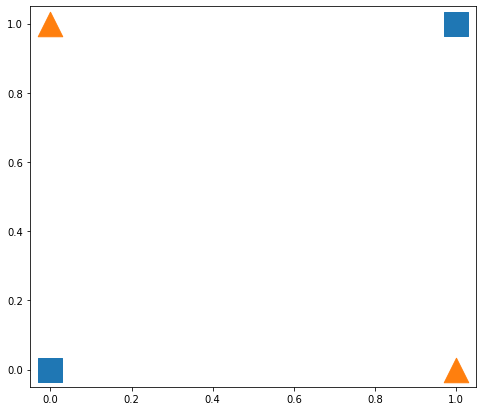

In [ ]:
#Grafico del problema XOR
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y = np.array([0, 0, 1, 1])
plt.figure(figsize=(8,7))
plt.scatter(X[:2,0], X[:2,1], marker="s", s = 600)
plt.scatter(X[2:,0], X[2:,1], marker="^", s = 600)

It turns out that some of the limitations of Perceptrons can be eliminated by stacking
multiple Perceptrons. The resulting ANN is called a Multilayer Perceptron (MLP).

<p><img alt="Colaboratory logo" height="350px" src="https://i.imgur.com/b69Plw4.png" align="center" hspace="10px" vspace="0px"></p>

In the case of one hidden layer with two neurons,and two inpunt feature, we can express the neural network in matrix form as


<p><img alt="Colaboratory logo" height="350px" width="5000px" src="https://i.imgur.com/MrfpJis.png" align="center" hspace="10px" vspace="0px"></p>


\begin{equation}
\textbf{z}^{[1]} = X^{[0]}\textbf{W}^{[1]} + B^{[1]} \\
X^{[1]} = sign(\textbf{z}^{[1]})
\end{equation}

where

\begin{equation}
X^{[0]}  = \begin{bmatrix}
                x^{(1)[0]}_1 \ x^{(1)[0]}_2\\
                x^{(2)[0]}_1 \ x^{(2)[0]}_2\\
                .\\
                .\\
                x^{(N)[0]}_1 \ x^{(N)[0]}_2\\
                \end{bmatrix}\,,
\textbf{W}^{[1]}  = \begin{bmatrix}
                w_{11}^{[1]} \ w_{12}^{[1]} \\
                w_{21}^{[1]} \ w_{22}^{[1]}
                \end{bmatrix}\,, 
\textbf{B}^{[1]}  = \begin{bmatrix}
                b_{1}^{[1]} \\
                b_{2}^{[1]}
                \end{bmatrix}\,        
\end{equation}

### Task

Consider the *XoR* problem presented above, and assume that

\begin{equation}
X^{[0]}  = \begin{bmatrix}
                0\ 0\\
                0\ 1\\
                1\ 0\\
                1\ 1\\
                \end{bmatrix}\,, 
y = \begin{bmatrix}
                0 \\
                1 \\
                1 \\
                0 \\
                \end{bmatrix}\,   
\end{equation}

1. Using the neural network show above to compute $\hat y$ and show that  
    \begin{equation}
    \hat y = y = \begin{bmatrix}
                    0 \\
                    1 \\
                    1 \\
                    0 \\
                    \end{bmatrix}\,   
    \end{equation}
    
    If you want you can use numpy to show this result.

# Cálculo Manual

Para este ejercicio seguiré una estructura más apegada a las indicaciones que brinda el gráfico de la red neuronal sobre el cálculo de las transformaciones usando los pesos y los interceptos. En primer lugar tenemos los siguientes datos:

\begin{equation}
X_{1}^{[0]}  = \begin{bmatrix}
                0\\
                0\\
                1\\
                1\\
                \end{bmatrix}\,,
X_{2}^{[0]} = \begin{bmatrix}
                0\\
                1\\
                0\\
                1\\
              \end{bmatrix}\,,
\textbf{W}^{[1]}  = \begin{bmatrix}
                1 \ 1 \\
                1 \ 1 \\
                \end{bmatrix}\,, 
\textbf{B}^{[1]}  = \begin{bmatrix}
                -1.5 \\
                -0.5
                \end{bmatrix}\,,
\textbf{W}^{[2]}  = \begin{bmatrix}
                -1 \\
                1 \\
                \end{bmatrix}\,, 
\textbf{B}^{[2]}  = \begin{bmatrix}
                -0.5
                \end{bmatrix}\,    
\end{equation}


Se calcula el resultado para la transformación en la primera neurona de la primera capa:

\begin{equation}
X_{1}^{[1]} = f(w_{1,1}^{[1]}X_{1}^{[0]} + w_{2,1}^{[1]}X_{2}^{[0]} + b_{1}^{[1]}) \\
X_{1}^{[1]} = f(1 \begin{bmatrix}
                      0 \\
                      0 \\
                      1 \\
                      1 \\
                  \end{bmatrix} +
                  1 \begin{bmatrix}
                      0 \\
                      1 \\
                      0 \\
                      1 \\
                  \end{bmatrix}
 -1.5) \\
X_{1}^{[1]} = f(\begin{bmatrix}
                      -1.5 \\
                      -0.5 \\
                      -0.5 \\
                      0.5 \\
                  \end{bmatrix})\\
X_{1}^{[1]} = \begin{bmatrix}
                      0 \\
                      0 \\
                      0 \\
                      1 \\
                  \end{bmatrix}
\end{equation}

Se calcula el resultado para la transformación en la segunda neurona de la primera capa:

\begin{equation}
X_{2}^{[1]} = f(w_{1,2}^{[1]}X_{1}^{[0]} + w_{2,2}^{[1]}X_{2}^{[0]} + b_{2}^{[1]}) \\
X_{2}^{[1]} = f(1 \begin{bmatrix}
                      0 \\
                      0 \\
                      1 \\
                      1 \\
                  \end{bmatrix} +
                  1 \begin{bmatrix}
                      0 \\
                      1 \\
                      0 \\
                      1 \\
                  \end{bmatrix}
 -0.5) \\
X_{2}^{[1]} = f(\begin{bmatrix}
                      -0.5 \\
                      0.5 \\
                      0.5 \\
                      1.5 \\
                  \end{bmatrix})\\
X_{2}^{[1]} = \begin{bmatrix}
                      0 \\
                      1 \\
                      1 \\
                      1 \\
                  \end{bmatrix}
\end{equation}

Se calcula el resutado para la transformación en la neurona de la segunda y última capa:

\begin{equation}
\hat y = X_{1}^{[2]} = f(w_{1,1}^{[2]}X_{1}^{[1]} + w_{2,1}^{[2]}X_{2}^{[1]} + b_{1}^{[2]}) \\
\hat y = X_{1}^{[2]} = f(-1 \begin{bmatrix}
                      0 \\
                      0 \\
                      0 \\
                      1 \\
                  \end{bmatrix} +
                  1 \begin{bmatrix}
                      0 \\
                      1 \\
                      1 \\
                      1 \\
                  \end{bmatrix}
 -0.5) \\
\hat y = X_{1}^{[2]} = f(\begin{bmatrix}
                      -0.5 \\
                      0.5 \\
                      0.5 \\
                      -0.5 \\
                  \end{bmatrix})\\
\hat y = X_{1}^{[2]} = \begin{bmatrix}
                      0 \\
                      1 \\
                      1 \\
                      0 \\
                  \end{bmatrix}
\end{equation}

##Conclusiones
Como se puede apreciar, haciendo el cálculo de manera manual y siguiendo las operaciones que se observan en el gráfico de la red neuronal al pie de la letra, el resultado es el mencionado en el enunciado, es decir, el esperado.

#Verificación Usando una Función

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # Se toma el X como pide el enunciado.

In [ ]:
"""
Entradas: La matriz r que resulta de realizar la suma pesada en las neuronas artificiales.
Salidas: La matriz r con nuevos valores que son el resultado de la aplicación de la función sign vista en clase.
Objetivo: Se recorre la matriz y se aplica la función sign. Si el valor en la matriz es mayor a 0, entonces su nuevo valor será uno,
          de lo contrario, si es menor o igual a cero, el nuevo valor en la matriz será cero.
"""
def function(r):
  rows = r.shape[0] # Necesito conocer la cantidad de filas de la matriz.
  columns = r.shape[1] # Necesito concer la cantidad de columnas de la matriz.
  # Ciclo donde recorro los valores de la matriz para revisar si son mayores o menores-iguales a cero.
  for row in range(rows):
    for col in range(columns):
      if(r[row][col] > 0): # Si el valor es mayor a cero, el nuevo valor en la matriz es 1.
        r[row][col] = 1
      elif(r[row][col]<= 0): # Si el valor menor-igual a cero, el nuevo valor en la matriz es 0.
        r[row][col] = 0

  return r

"""
Entradas: recibe la matriz X de datos, donde se encuentran las características del problema del XOR.s
Salidas: Una matriz yPred con los datos que resultan de pasar X por la red neuronal diseñada para solucionar el problema del XOR. Se toman
         como las predicciones que hace el modelo y deben coincidir con las que se nos pasan en el enunciado.
Objetivo: El objetivo es llevar a cabo las operaciones que normalmente se realizan sobre la matriz X en la red neuronal diseñada, teniendo
          en cuenta las matrices de pesos W1, W2 y los interceptos B1 y B2, para llegar a una predicción. Estas matrices mencionadas fueron
          proporcionadas por el ejercicio.
"""
def verify_XOR(X):
  #Se construyen las matrices que servirán para aplicar las transformaciones a X en la red neuronal.
  W1 = np.ones((2, 2))
  B1 = np.array([[-1.5], [-0.5]])
  W2 = np.array([[-1], [1]])
  B2 = -0.5

  X_layer1 = function(np.dot(X, W1) + B1.reshape(1, 2)) # Se calcula el resultado de las transformaciones de la primera capa.
  yPred = function(np.dot(X_layer1, W2) + B2) # Se calcula el resultado de las transformaciones de la segunda y última capa. Se considera el resultado o predicción.

  return yPred

In [ ]:
verify_XOR(X)

array([[0.],
       [1.],
       [1.],
       [0.]])

## Conclusiones

Usando algunos métodos de numpy para el manejo de matrices y sus respectivas operaciones, además de la aplicación de la estructura de las matrices que nos provee el ejercicio, se llegó a que el resultado de pasar los datos de las características del problema XOR por la red neuronal diseñada con los pesos e interceptos indicados en el enunciado es:

\begin{equation}
    yPred = \begin{bmatrix}
                    0 \\
                    1 \\
                    1 \\
                    0 \\
                    \end{bmatrix}\,   
    \end{equation}

Esto coincide con el resultado esperado según el enunciado.